In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/Users/augustincablant/Desktop/Time Series project/data.csv", sep = ';')
df

,Libellé,"Indice CVS-CJO de la production industrielle (base 2021) - Travail du bois et fabrication d'articles en bois et en liège, à l'exception des meubles, fabrication d'articles en vannerie et sparterie (NAF rév. 2, niveau division, poste 16)",Codes
0,idBank,010767746,NaN
1,Dernière mise à jour,05/04/2024 08:45,NaN
2,Période,NaN,NaN
3,2024-02,89.35,A
4,2024-01,88.16,A
...,...,...,...
408,1990-05,140.66,A
409,1990-04,135.77,A
410,1990-03,141.99,A
411,1990-02,144.73,A


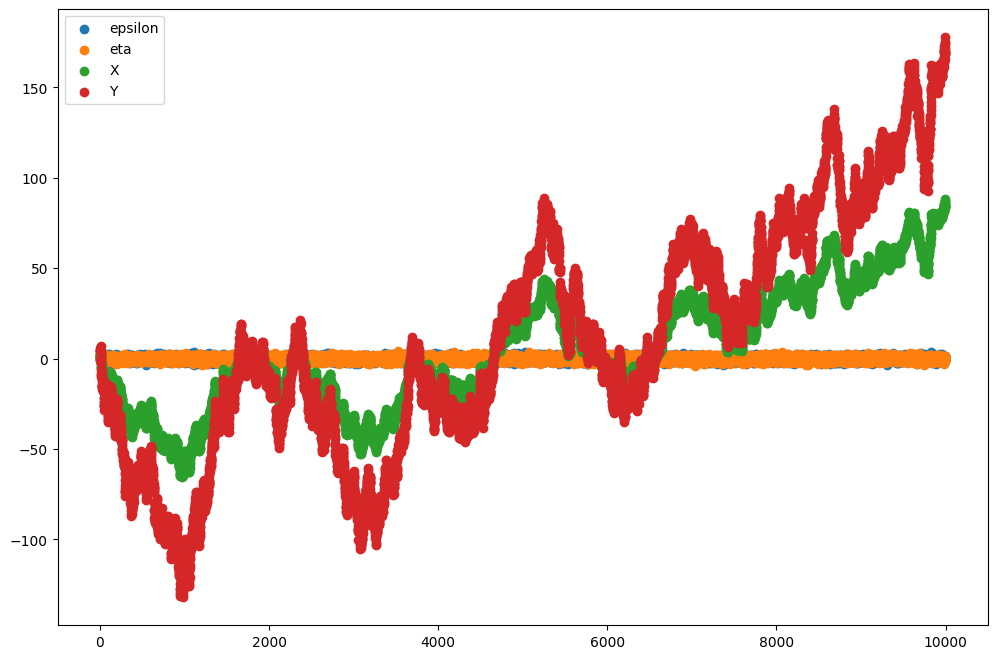

In [5]:
T = 10**4
epsilon, eta = np.random.normal(0,1, T), np.random.normal(0,1, T)
X = np.cumsum(epsilon)
Y = 2 * X + eta 

plt.figure(figsize=(12,8))
plt.scatter(list(range(T)), epsilon, label = "epsilon")
plt.scatter(list(range(T)), eta, label = "eta")
plt.scatter(list(range(T)), X, label = "X")
plt.scatter(list(range(T)), Y, label = "Y")
plt.legend()
plt.show()

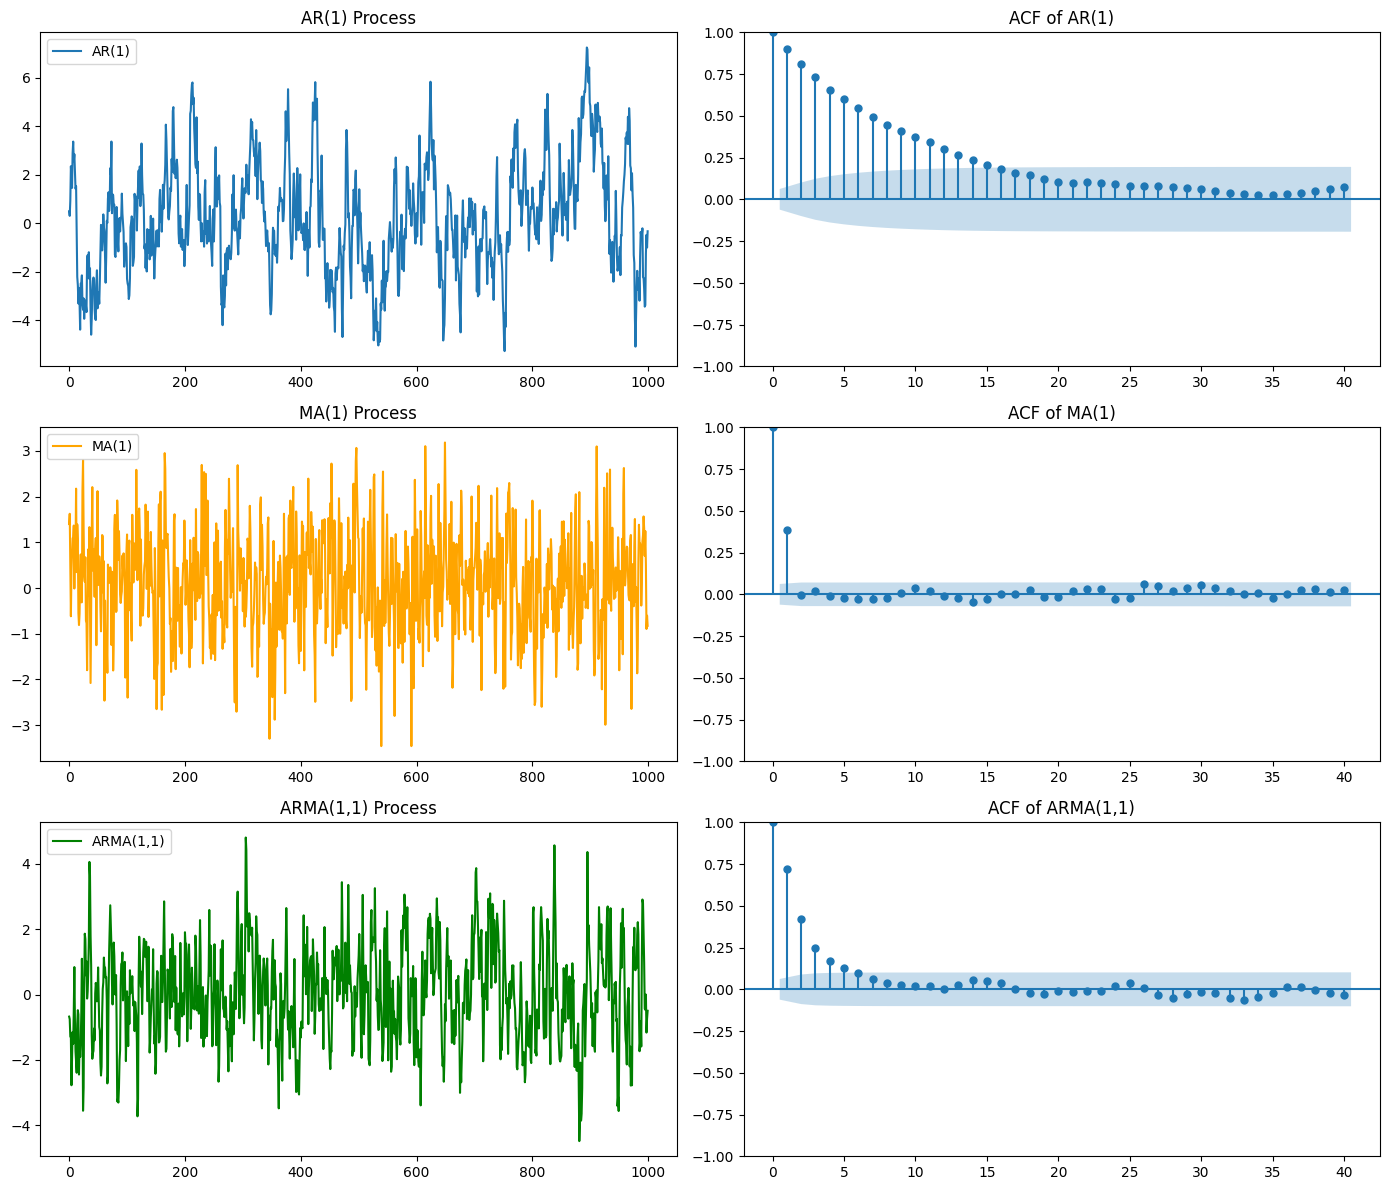

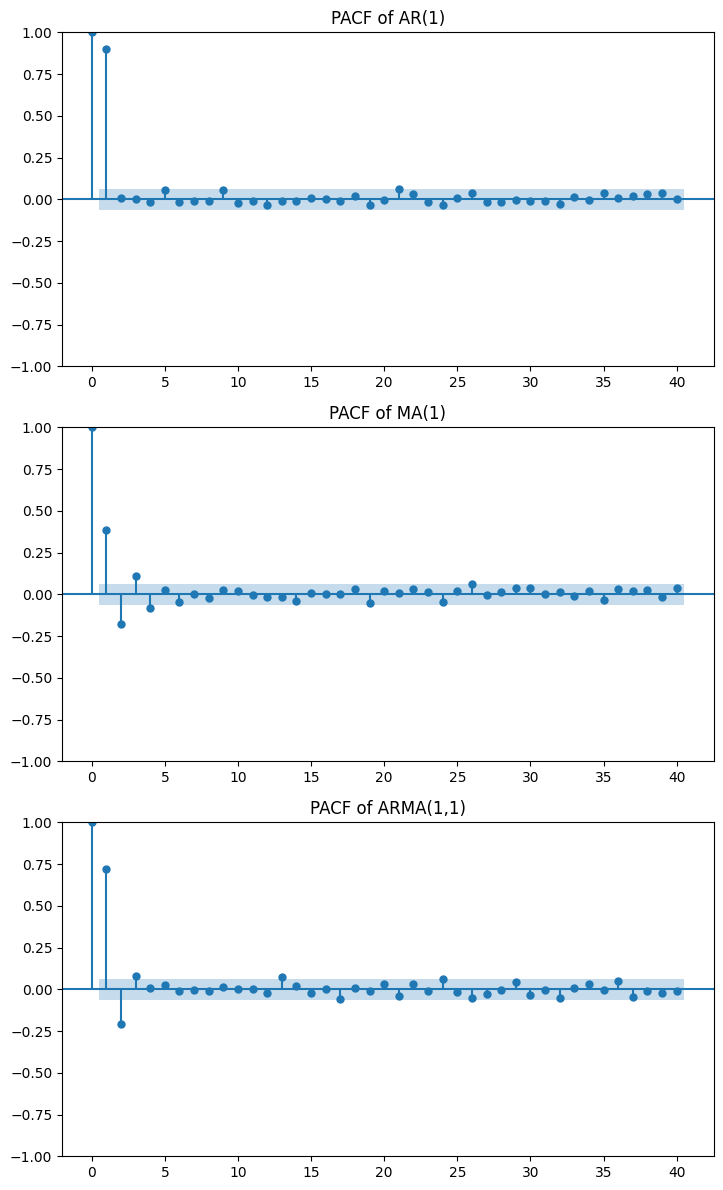

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Générer une série AR(1) avec φ = 0.9
ar1 = np.array([1, -0.9])
ma0 = np.array([1])
AR1_process = ArmaProcess(ar1, ma0)
AR1_series = AR1_process.generate_sample(nsample=1000)

# Générer une série MA(1) avec θ = 0.5
ar0 = np.array([1])
ma1 = np.array([1, 0.5])
MA1_process = ArmaProcess(ar0, ma1)
MA1_series = MA1_process.generate_sample(nsample=1000)

# Générer une série ARMA(1,1) avec φ = 0.6 et θ = 0.3
ar1 = np.array([1, -0.6])
ma1 = np.array([1, 0.3])
ARMA11_process = ArmaProcess(ar1, ma1)
ARMA11_series = ARMA11_process.generate_sample(nsample=1000)

# Tracer les séries temporelles
plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
plt.plot(AR1_series, label='AR(1)')
plt.title('AR(1) Process')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(MA1_series, label='MA(1)', color='orange')
plt.title('MA(1) Process')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(ARMA11_series, label='ARMA(1,1)', color='green')
plt.title('ARMA(1,1) Process')
plt.legend()

# Tracer les ACF et PACF
plt.subplot(3, 2, 2)
plot_acf(AR1_series, ax=plt.gca(), lags=40)
plt.title('ACF of AR(1)')

plt.subplot(3, 2, 4)
plot_acf(MA1_series, ax=plt.gca(), lags=40)
plt.title('ACF of MA(1)')

plt.subplot(3, 2, 6)
plot_acf(ARMA11_series, ax=plt.gca(), lags=40)
plt.title('ACF of ARMA(1,1)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 12))

plt.subplot(3, 2, 1)
plot_pacf(AR1_series, ax=plt.gca(), lags=40)
plt.title('PACF of AR(1)')

plt.subplot(3, 2, 3)
plot_pacf(MA1_series, ax=plt.gca(), lags=40)
plt.title('PACF of MA(1)')

plt.subplot(3, 2, 5)
plot_pacf(ARMA11_series, ax=plt.gca(), lags=40)
plt.title('PACF of ARMA(1,1)')

plt.tight_layout()
plt.show()
